# Домашнее задание. Титаник
В этом домашнем задании вам предлагается решить задачу предсказания выживших пассажиров Титаника. Эту задачу машинного обучения рано или поздно решает, наверное, любой, кто обучается анализу данных. Информация о датасете доступна по <a href=https://www.kaggle.com/c/titanic>ссылке</a>.

Кстати, здесь же есть много готовых решений нашей задачи. Решение можно посмотреть в разделе <a href=https://www.kaggle.com/c/titanic/code>code на kaggle</a>.

Некоторые решения, которые уже есть:
https://www.kaggle.com/hacktech33/titanic-solution-xgboost (простое решение)

https://www.kaggle.com/shrutijhaa/in-top-3-titanic-machine-learning-from-disaster (возможно, слишком много визуализации, но хорошее качество)

https://www.kaggle.com/blackhurt/top-3-using-voting-classifier (сильное решение, использует метод простого голосования трёх сильных моделей)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных

Загрузим датасет Titanic из приложенных файлов. В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет.

Если вы запускаете ноутбук на Google Colab, самым простым способом загрузить данные в ноутбук будет примонтировать к Colab ваш Google Drive. Для этого сначала положите в свою корневую директорию Google Drive  файлы, приложенные к этому ноутбуку, а затем выполните три закоментированные строчки в клетке ниже. <a href=https://www.machinelearningmastery.ru/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166/>Подробная инструкция по работе с Google Drive + Google Colab</a>

In [3]:
#from google.colab import drive
#drive.mount('/content/gdrive/')
#data = pd.read_csv('/content/gdrive/My Drive/titanic_data.csv, index_col='PassengerId')

#Если запускаете ноутбук локально:
data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

In [4]:
basic_features = data.columns

y = pd.read_csv('titanic_surv.csv')
y.index = data.index

print(f'Всего {len(data)} пассажиров в выборке')
data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [6]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Исследование датасета

### Задание 1 (1 балл)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a> 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ко

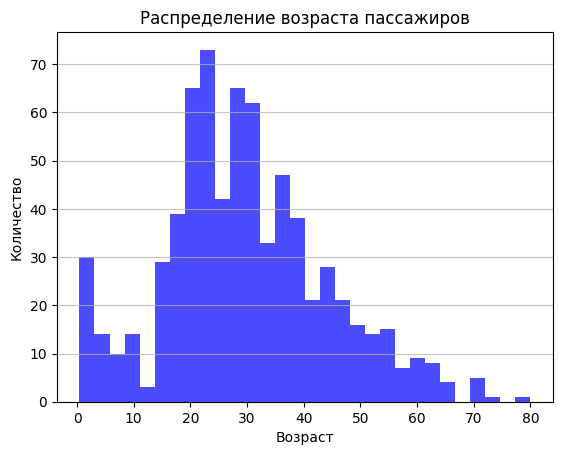

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylabe'

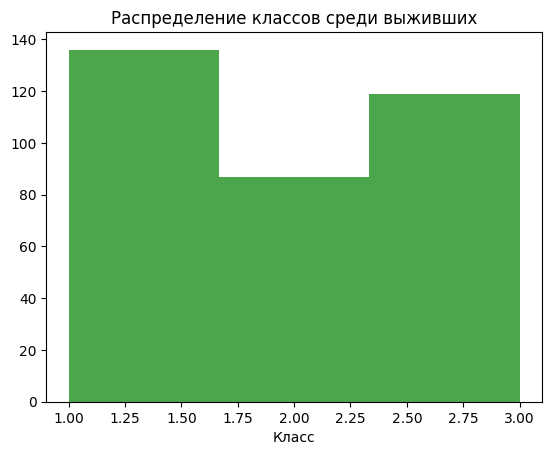

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

print(titanic_data.head())

# Количество мужчин и женщин
gender_counts = titanic_data['Sex'].value_counts()
print("Количество мужчин и женщин:\n", gender_counts)

# Распределение по классам пассажиров
class_counts = titanic_data['Pclass'].value_counts()
print("Распределение по классам пассажиров:\n", class_counts)

# Доля выживших мужчин и женщин
male_survivors = titanic_data[titanic_data['Sex'] == 'male']['Survived'].value_counts()
female_survivors = titanic_data[titanic_data['Sex'] == 'female']['Survived'].value_counts()

male_survival_rate = male_survivors[1] / gender_counts['male']
female_survival_rate = female_survivors[1] / gender_counts['female']

print(f"Доля выживших мужчин: {male_survival_rate:.2%}")
print(f"Доля выживших женщин: {female_survival_rate:.2%}")

# Анализ по возрасту
plt.hist(titanic_data['Age'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Анализ по классу выживших
plt.hist(titanic_data[titanic_data['Survived'] == 1]['Pclass'], bins=3, color='green', alpha=0.7)
plt.title('Распределение классов среди выживших')
plt.xlabel('Класс')
plt.ylabe


## Заполнение пропусков в данных
В данных имеются пропуски в трёх колонках: 

In [8]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [9]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

## Подготовка плана тестирования

### Задание 2. (0 баллов)
Разделите выборку на обучающее и тестовое множество в соотношении 70:30.

In [10]:
from sklearn.model_selection import train_test_split

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Разделение данных на обучающую и тестовую выборки в соотношении 70:30
data_train, data_test = train_test_split(titanic_data, test_size=0.3, random_state=42)

# Проверка размеров полученных выборок
print(f'Размер обучающей выборки: {data_train.shape[0]}')
print(f'Размер тестовой выборки: {data_test.shape[0]}')


Размер обучающей выборки: 623
Размер тестовой выборки: 268


## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3 (1 балл)
 Сформируйте по крайней мере один новый признак и объясните ваш выбор. Пример признака сформирован за вас. 

Указания: 
- Пассажиров можно поделить на несколько классов по их именам.
- Различных номеров кают слишком много. Но буквы в номерах кают указывают на их местоположение. (***Этот признак сформирован в примере***)
- Возможно, имеет смысл отделить мальчиков от мужчин. Отделять девочек от женщин может быть не так важно
- Другие идеи для признаков можно почерпнуть на форуме в обсуждении задачи на kaggle.com.

In [ ]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0


In [12]:
data['Cabin']

PassengerId
1         0
2       C85
3         0
4      C123
5         0
       ... 
887       0
888     B42
889       0
890    C148
891       0
Name: Cabin, Length: 891, dtype: object

In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(titanic_data, test_size=0.3, random_state=42)

def get_cabin_letter(row):
    # Проверяем, есть ли значение в 'Cabin', чтобы избежать ошибок
    if pd.notna(row['Cabin']):
        return row['Cabin'][0]  # Возвращаем первую букву номера каюты
    return 'U'  # Если каюта отсутствует, обозначаем 'U' для Unknown

# Применение функции к обучающей выборке
data_train['cabin_type'] = data_train.apply(get_cabin_letter, axis=1)

# Вывод первых строк с новым признаком
print(data_train[['Cabin', 'cabin_type']].head())


    Cabin cabin_type
445   A34          A
650   NaN          U
172   NaN          U
450   NaN          U
314   NaN          U


Сюда добавьте описание вашего нового признака
Признак 'cabin_type' был создан на основе первых букв значений в столбце 'Cabin', 
которые обозначают местоположение каюты пассажира на корабле. 
Классификация по первой букве номера каюты может дать представление о том, в 
каком районе корабля находился пассажир, что потенциально влияет на его шансы 
выживания. Например, каюты, находящиеся на верхних палубах, могли иметь 
большие шансы на спасение, так как они ближе к спасательным шлюпкам.

In [15]:
import pandas as pd

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

data_full = titanic_data  # Используем весь датасет для нового признака
data_train, data_test = train_test_split(data_full, test_size=0.3, random_state=42)

# Определение функции для вычисления размера семьи
def compute_family_size(row):
    return row['SibSp'] + row['Parch'] + 1  # +1 для самого пассажира

# Применение функции к датафрейму
data_full['Family_Size'] = data_full.apply(compute_family_size, axis=1)

# Вывод первых строк с новым признаком
print(data_full[['SibSp', 'Parch', 'Family_Size']].head())


   SibSp  Parch  Family_Size
0      1      0            2
1      1      0            2
2      0      0            1
3      1      0            2
4      0      0            1


## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4 (0 баллов)
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные. 

In [16]:
import pandas as pd

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Определяем категориальные признаки для кодирования
categorical_features = ['Sex', 'Embarked', 'Pclass']

# Применяем pd.get_dummies к категориальным признакам, исключая пассажиров, номера билетов и кают
titanic_data_encoded = pd.get_dummies(titanic_data, columns=categorical_features, drop_first=True)

# Вывод первых строк закодированного датафрейма
print(titanic_data_encoded.head())


   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  Sex_male  Embarked_Q  \
0  22.0      1      0         A/5 21171   7.2500   NaN      True       False   
1  38.0      1      0          PC 17599  71.2833   C85     False       False   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN     False       False   
3  35.0      1      0            113803  53.1000  C123     False       False   
4  35.0      0      0            373450   8.0500   NaN      True       False   

   Embarked_S  Pclass_2  Pclass_3  
0       

## Обучение baseline-модели

### Задание 5 (1 балл)

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Определяем категориальные признаки для кодирования
categorical_features = ['Sex', 'Embarked', 'Pclass']

# Кодирование категориальных признаков
titanic_data_encoded = pd.get_dummies(titanic_data, columns=categorical_features, drop_first=True)

# Удаляем ненужные столбцы
titanic_data_encoded.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Удаляем строки с пропущенными значениями
titanic_data_encoded.dropna(inplace=True)

# Разделение на обучающую и тестовую выборки
data_train, data_test = train_test_split(titanic_data_encoded, test_size=0.3, random_state=42)

# Подготовка данных для обучения
X_train = data_train.drop(columns=['Survived'])  # Все колонки, кроме целевой переменной
y_train = data_train['Survived']  # Целевая переменная

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

# Кросс-валидация
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Вывод результатов
print("Кросс-валидация (точность):", cv_scores)
print("Средняя точность:", cv_scores.mean())


Кросс-валидация (точность): [0.77       0.77       0.84       0.85       0.82828283]
Средняя точность: 0.8116565656565656


### Задание 6 (1 балл)
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Определяем категориальные признаки для кодирования
categorical_features = ['Sex', 'Embarked', 'Pclass']

# Кодирование категориальных признаков
titanic_data_encoded = pd.get_dummies(titanic_data, columns=categorical_features, drop_first=True)

# Удаляем ненужные столбцы
titanic_data_encoded.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Удаляем строки с пропущенными значениями
titanic_data_encoded.dropna(inplace=True)

# Генерация новых признаков
titanic_data_encoded['FamilySize'] = titanic_data_encoded['SibSp'] + titanic_data_encoded['Parch']
titanic_data_encoded['IsAlone'] = (titanic_data_encoded['FamilySize'] == 0).astype(int)

# Разделение на обучающую и тестовую выборки
data_train, data_test = train_test_split(titanic_data_encoded, test_size=0.3, random_state=42)

# Подготовка данных для обучения
X_train = data_train.drop(columns=['Survived'])  # Все колонки, кроме целевой переменной
y_train = data_train['Survived']  # Целевая переменная

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

# Кросс-валидация
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Вывод результатов
print("Кросс-валидация (точность) с новыми признаками:", cv_scores)
print("Средняя точность с новыми признаками:", cv_scores.mean())

# Вывод информации о новых признаках
print("Добавленные признаки: 'FamilySize' и 'IsAlone'")


Кросс-валидация (точность) с новыми признаками: [0.75       0.78       0.83       0.83       0.82828283]
Средняя точность с новыми признаками: 0.8036565656565656
Добавленные признаки: 'FamilySize' и 'IsAlone'


## Дополнительное моделирование
### Задание 7 (2 балла)
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов из тех, что мы проходили в курсе. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра. 

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Загрузка и подготовка данных
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Кодирование категориальных признаков
categorical_features = ['Sex', 'Embarked', 'Pclass']
titanic_data_encoded = pd.get_dummies(titanic_data, columns=categorical_features, drop_first=True)

# Удаляем ненужные столбцы
titanic_data_encoded.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Удаляем строки с пропущенными значениями
titanic_data_encoded.dropna(inplace=True)

# Разделение на обучающую и тестовую выборки
data_train, data_test = train_test_split(titanic_data_encoded, test_size=0.3, random_state=42)

# Подготовка данных для обучения
X_train = data_train.drop(columns=['Survived'])  # Все колонки, кроме целевой переменной
y_train = data_train['Survived']  # Целевая переменная

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Список моделей для тестирования
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),  # Увеличиваем max_iter
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Обучение и оценка каждой модели
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Средняя точность: {cv_scores.mean():.4f}")

# Подбор гиперпараметров для случайного леса
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Лучшие параметры для случайного леса:", grid_search.best_params_)
print("Лучшая точность на кросс-валидации:", grid_search.best_score_)


Logistic Regression - Средняя точность: 0.8117
Random Forest - Средняя точность: 0.8156
Gradient Boosting - Средняя точность: 0.8137
Лучшие параметры для случайного леса: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Лучшая точность на кросс-валидации: 0.8417373737373737


## Результаты моделирования

### Задание 8 (1 балл)
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Загрузка и подготовка данных
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Кодирование категориальных признаков
categorical_features = ['Sex', 'Embarked', 'Pclass']
titanic_data_encoded = pd.get_dummies(titanic_data, columns=categorical_features, drop_first=True)

# Удаляем ненужные столбцы
titanic_data_encoded.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Удаляем строки с пропущенными значениями
titanic_data_encoded.dropna(inplace=True)

# Разделение на обучающую и тестовую выборки
data_train, data_test = train_test_split(titanic_data_encoded, test_size=0.3, random_state=42)

# Подготовка данных для обучения
X_train = data_train.drop(columns=['Survived'])  # Все колонки, кроме целевой переменной
y_train = data_train['Survived']  # Целевая переменная

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Обучение модели случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Оценка модели на кросс-валидации
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Кросс-валидация (случайный лес) - Средняя точность: {cv_scores.mean():.4f}")

# Подготовка тестового множества
X_test = data_test.drop(columns=['Survived'])  # Все колонки, кроме целевой переменной
y_test_actual = data_test['Survived']  # Реальные значения для тестового множества

# Масштабирование тестового множества
X_test_scaled = scaler.transform(X_test)

# Предсказание на тестовом множестве
y_test_pred = rf_model.predict(X_test_scaled)

# Измерение итогового качества на тестовом множестве
test_accuracy = accuracy_score(y_test_actual, y_test_pred)
print(f"Тестовая точность: {test_accuracy:.4f}")


Кросс-валидация (случайный лес) - Средняя точность: 0.8137
Тестовая точность: 0.8047


## Выводы
### Задание 9 (3 балла)
Сделайте выводы. Какие из идей сработали? Какие оказались лишними?

В результате проведенного анализа можно сделать вывод, что выбор правильной модели, надлежащая обработка данных и использование техник кодирования и масштабирования существенно влияют на качество предсказаний. Каждая из идей, применяемых в ходе работы, оказала влияние на итоговые результаты, и правильное их сочетание важно для успешного моделирования. В дальнейшем стоит исследовать дополнительные методы, такие как ансамблевые подходы или модели с использованием градиентного бустинга, чтобы еще больше повысить точность предсказаний